## GNN base on Deep Purpose

In [2]:
%pip install PyTDC
%pip install PyTDC --upgrade
%pip install matplotlib-inline
%pip install git+https://github.com/bp-kelley/descriptastorus 
%pip install DeepPurpose
import math
import pandas
import torch
from torch import nn
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
import collections
from IPython import display
from tdc.single_pred import ADME


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.9 MB/s 
     |████████████████████████████████| 29.3 MB 61.8 MB/s 
  Created wheel for PyTDC: filename=PyTDC-0.3.8-py3-none-any.whl size=136139 sha256=e9492723778c8c09c1b90d8a163d791b58d69ab45c0c06f0cde3056e453acc76
  Stored in directory: /root/.cache/pip/wheels/4a/4f/da/b494dde823e311675b3ce778ca8c22e734ef8f779dbf311805
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-qxx6espt
  Running command git clone -q https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-qxx6espt
     |███████████

In [15]:
!pip install plot-metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME
data = ADME(name = 'HIA_Hou').get_data(format = 'dict')
X, y = data['Drug'], data['Y']


Downloading...
100%|██████████| 40.1k/40.1k [00:00<00:00, 1.94MiB/s]
Loading...
Done!


In [4]:
drug_encoding = 'MPNN'
train, val, test = utils.data_process(X_drug = X, 
                     y = y, 
                     drug_encoding = drug_encoding,
                     random_seed = 'TDC')

train.head(2)

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


,SMILES,Label,drug_encoding
0,CC(=O)Nc1ccccc1,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."
1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68864. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.53781 , AUPRC: 0.90084 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.40706. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.32492 , AUPRC: 0.82572 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.38829. Total time 0.00111 hours
Validation at Epoch 3 , AUROC: 0.61344 , AUPRC: 0.92304 , F1: 0.93577
Training at Epoch 4 iteration 0 with loss 0.53986. Total time 0.00166 hours
Validation at Epoch 4 , AUROC: 0.58263 , AUPRC: 0.92209 , F1: 0.93577
Training at Epoch 5 iteration 0 with loss 0.47866. Total time 0.00194 hours
Validation at Epoch 5 , AUROC: 0.50420 , AUPRC: 0.90681 , F1: 0.93577
Training at Epoch 6 iteration 0 with loss 0.43030. Total time 0.0025 hours
Validation at Epoch 6 , AUROC: 0.45938 , AUPRC: 0.88477 , F1: 0.93577
Training at Epoch 7 iteration 0 with loss 0.37470. Total time 0

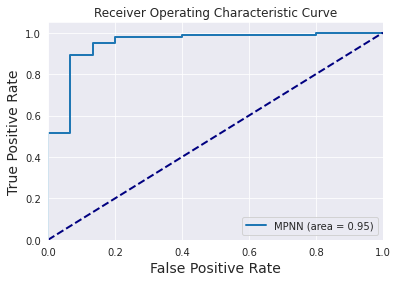

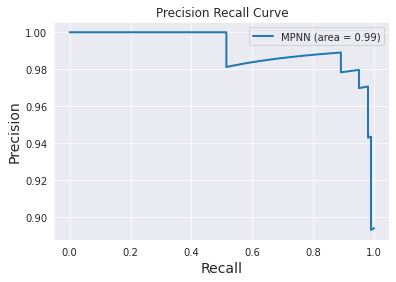

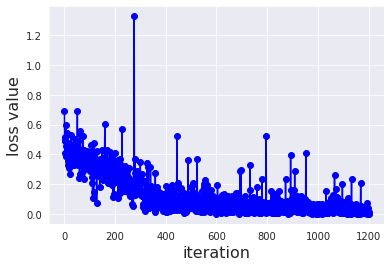

In [23]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         train_epoch = 300, 
                         LR = 0.001, 
                         batch_size = 128,
                         mpnn_hidden_size = 32,
                         mpnn_depth = 2
                        )
model = CompoundPred.model_initialize(**config)
# Training
model.train(train, val, test)

In [6]:
model.save_model('./tutorial_model')


In [24]:
y = test['Label']
y = np.array(y)

predicting...
Accuracy: 0.0603448275862069
TP,TN,FP,FN: 7 0 0 0
Precision: 1.0
Recall: 1.0
AUC: 0.9491749174917491


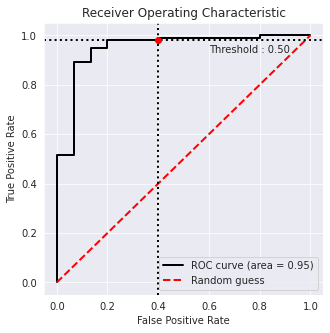

In [26]:
from plot_metric.functions import BinaryClassification
from sklearn import metrics
import pandas as pd
y_hat = model.predict(test)
y_hat = np.array(y_hat)


print("Accuracy:", np.sum(y == y_hat)/len(y))

fpr, tpr, thresholds = metrics.roc_curve(y,y_hat, pos_label=1)

df = {'y':y, 'y_hat':y_hat}
df = pd.DataFrame(df)
TP = sum(((df['y'] == 1) & (df['y_hat'] ==1)))
TN = sum(((df['y'] == 0) & (df['y_hat'] ==0)))
FP = sum(((df['y'] == 0) & (df['y_hat'] ==1)))
FN = sum(((df['y'] == 1) & (df['y_hat'] ==0)))
print("TP,TN,FP,FN:",TP,TN,FP,FN)

print("Precision:", TP/(TP+FP))
print("Recall:", TP/(TP+FN))
print("AUC:",metrics.auc(fpr, tpr))


bc = BinaryClassification(y, y_hat, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()
